# Sentiment Analysis - Movie Reviews Corpus
Paula Esteve i Claudia Gallego

25 de març del 2025
## Part 1

In [1]:
# Llibreries

import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import movie_reviews, stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Pre-processament 

Primer descarreguem els recursos necessaris de la llibreria NLTK, concretament el corpus movie_reviews i les stopwords, que són paraules comunes com "el", "i", "de" que sovint s'eliminen en el processament de text. Tot seguit, carreguem les dades del corpus Movie Reviews, que conté ressenyes de pel·lícules etiquetades com a positives o negatives. Per a cada categoria (positiva o negativa), i per a cada arxiu associat a aquesta categoria, extraiem les paraules de la ressenya i les guardem juntament amb la seva etiqueta en una tupla. Aquestes tuples es recullen en una llista anomenada documents. Finalment, transformem aquesta llista en un DataFrame de pandas, amb dues columnes: una que conté la ressenya en forma de llista de paraules i una altra que indica si el sentiment de la ressenya és positiu o negatiu.

In [13]:
# Carregar les dades

nltk.download('movie_reviews')
nltk.download('stopwords')

# Carregar el corpus de Movie Reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Transformar a DataFrame
df = pd.DataFrame(documents, columns=['review', 'sentiment'])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


A continuació, inicialitzem les paraules buides (stopwords) i la puntuació. Utilitzem la llista de stopwords proporcionada per NLTK i creem un traductor per eliminar la puntuació dels textos. A continuació, definim una funció anomenada preprocess_text per processar cada ressenya. Aquesta funció primer uneix les paraules de la ressenya en una cadena i les converteix a minúscules, després elimina la puntuació mitjançant el traductor creat, i finalment elimina les stopwords. Aquest preprocesament s'aplica a cada ressenya del conjunt de dades. 

Després, utilitzem el CountVectorizer per transformar les ressenyes en una matriu de termes de documents, on cada fila representa una ressenya i cada columna un terme (paraula) que apareix en alguna ressenya. Aquest vectoritzador crea una matriu de característiques numèriques de les ressenyes processades. Finalment, es crea un vector y que conté les etiquetes de sentiment, on es codifica "pos" com a 1 (positiu) i "neg" com a 0 (negatiu).

In [14]:
# Preprocessament del text

# Inicialitzar stopwords i puntuació
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)  

# Funció per preprocessar el text
def preprocess_text(text):
    text = " ".join(text).lower()  # Unir paraules i convertir a minúscules
    text = text.translate(translator)  # Eliminar puntuació
    text = " ".join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

# Aplicar preprocesament al text
df['review'] = df['review'].apply(preprocess_text)

# Vectorizació amb CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review']) # Matriu de termes de document
y = np.array([1 if sentiment == 'pos' else 0 for sentiment in df['sentiment']])


dividim el conjunt de dades en dos subsets: un per entrenar (80%) i un per provar (20%), utilitzant la funció train_test_split de sklearn. A continuació, definim una sèrie de models supervisats (Regressió Logística, Naïve Bayes, SVM i Random Forest) juntament amb els seus possibles hiperparàmetres en un diccionari anomenat param_grid. Per a cada model, utilitzem la tècnica de GridSearchCV, que realitza una cerca de tots els combinats possibles d’hiperparàmetres, utilitzant validació creuada amb 5 folds i avaluant els models en funció de la seva precisió. Un cop obtingut el millor model per cada cas, fem les prediccions sobre el conjunt de test i calculem la precisió mitjançant accuracy_score. Després, mostrem la matriu de confusió per a cada model per veure els resultats en detall. Finalment, es crea un DataFrame amb les precisions de cada model i es mostra la comparació. També s’imprimeixen els millors hiperparàmetres per a cada model i s’identifica el millor model en funció de la seva precisió, juntament amb els seus paràmetres associats.

El resultat mostrat mostra la comparació de la precisió obtinguda per cada model en el conjunt de test. Aquests valors indiquen que la Regressió Logística és el model més precís per a aquesta tasca, seguit per SVM i Random Forest.

A continuació, es presenten els millors paràmetres obtinguts per cada model. Per la Regressió Logística, els millors paràmetres són C=1 i solver='lbfgs', mentre que per Naïve Bayes, el millor valor per al paràmetre alpha és 1.0. Per l'SVM, els millors paràmetres són C=0.1 i kernel='linear'. Finalment, per al Random Forest, els millors paràmetres són max_depth=20 i n_estimators=200.

El millor model, segons la precisió, és la Regressió Logística amb els paràmetres {'C': 1, 'solver': 'lbfgs'}. 

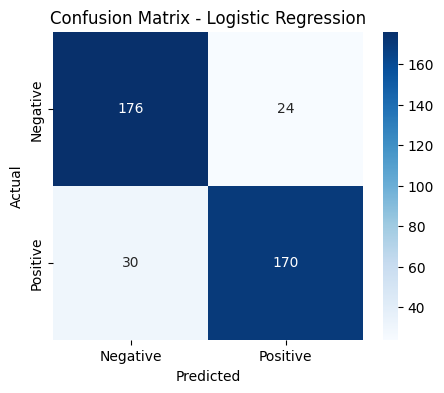

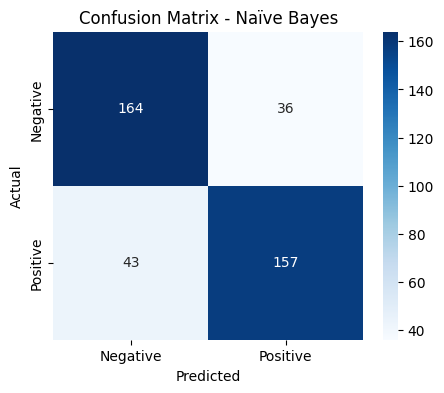

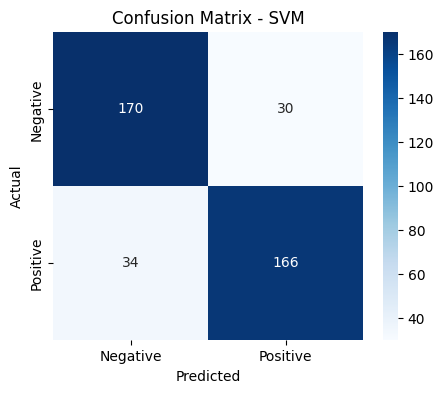

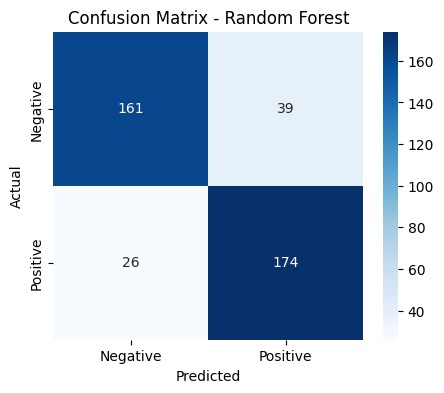

Model Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression    0.8650
1          Naïve Bayes    0.8025
2                  SVM    0.8400
3        Random Forest    0.8375
Best Parameters for Each Model:
                 Model                         Best Parameters
0  Logistic Regression             {'C': 1, 'solver': 'lbfgs'}
1          Naïve Bayes                          {'alpha': 1.0}
2                  SVM          {'C': 0.1, 'kernel': 'linear'}
3        Random Forest  {'max_depth': 20, 'n_estimators': 200}

Best model: Logistic Regression with parameters {'C': 1, 'solver': 'lbfgs'}


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150105, stratify=y)

# Modelos supervisados y sus hiperparámetros
param_grid = {
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    "Naïve Bayes": {
        'alpha': [0.1, 0.5, 1.0]
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# GridSearchCV y evaluación de modelos
results = {}
best_params = {}
best_model = None
best_model_name = ""

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = accuracy
    best_params[name] = grid_search.best_params_

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Comparación de precisiones
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("Model Accuracy Comparison:")
print(results_df)

# Mejores hiperparámetros
best_params_df = pd.DataFrame(list(best_params.items()), columns=['Model', 'Best Parameters'])
print("Best Parameters for Each Model:")
print(best_params_df)

# Obtener el mejor modelo con sus mejores parámetros
best_model_name = max(results, key=results.get)  # Modelo con la mejor precisión
best_model_params = best_params[best_model_name]  # Los mejores parámetros para ese modelo

print(f"\nBest model: {best_model_name} with parameters {best_model_params}")





Per veure quines ressenyes no han estat classificades correctament creem un diccionari anomenat misclassified_reviews_dict per emmagatzemar les ressenyes que el millor model ha classificat incorrectament. Després, fem les prediccions sobre el conjunt de test utilitzant el millor model obtingut per grid_search.best_estimator_. A continuació, recorrem cada ressenya en el conjunt de test i comparem el sentiment real (emmagatzemat a y_test) amb el sentiment predicte pel model (emmagatzemat a y_pred_best). Si els sentiments no coincideixen, emmagatzemem l'índex de la ressenya i els sentiments real i predicte en el diccionari.

Després, comparem els sentiments real i predicte per cada ressenya mal classificada. Per cada ressenya, imprimim el sentiment real (indicat com "Positiu" o "Negatiu" segons el valor) i el sentiment predicte pel model. També imprimim el text original de la ressenya recuperat del corpus utilitzant movie_reviews.raw() per veure exactament com era el text complet abans del preprocesament. Hem imprès les 10 primeres ressenyes per fer un anàlisi. 

Les ressenyes mal classificades com a positives quan realment eren negatives tenen algunes característiques comunes. Sovint utilitzen un to irònic o sarcàstic, on el llenguatge aparentment positiu s'utilitza per expressar una opinió negativa. Aquest tipus de ressenyes poden incloure elogis superficials o menors, com l'elogiar algunes qualitats tècniques (com la cinematografia o l'actuació) però, al mateix temps, subratllant de manera destacada les falles o mancances importants de la pel·lícula. El model pot interpretar aquests elements superficials com a positius i passar per alt els comentaris més crítics. Un altre cas es dóna quan el model interpreta un llenguatge equilibrat com una opinió completament positiva, obviant els elements crítics. Un exemple seria una ressenya com "Tot i que la pel·lícula no és perfecta, alguns dels personatges tenen una química interessant i la trama, tot i que previsiblement, ofereix una certa dosi de diversió". Tot i que la ressenya reconeix que la pel·lícula té defectes, el model pot centrar-se només en la part que parla de "diversió", considerant-la com una valoració positiva.

 D'altra banda, una ressenya positiva classificada com a negativa sovint fa servir sarcasme per lloar un aspecte de la pel·lícula mentre critica altres parts. Per exemple, "Aquest podria ser el millor thriller de l'any, si només el guió no hagués estat tan previsible i els diàlegs tan buits. Però bé, qui necessita una història quan tenim explosions?" Aquí, el sarcasme fa que el model entengui la ressenya com a negativa, quan en realitat la crítica al guió i els diàlegs és l'aspecte més destacat. Finalment, en el cas d'una ressenya negativa que es classifica com a positiva, el model sovint es centra en els pocs aspectes positius mencionats, ignorant les crítiques més importants. Un exemple seria "Tot i que l'actuació de l'actor principal és destacable i el disseny de producció és visualment atractiu, la trama és tan previsible que perd tot l'interès". En aquest cas, el model podria considerar la ressenya com a positiva per les mencions a l'actuació i la producció, tot i que la trama és un element fonamental de la crítica.

In [ ]:
# Crear un diccionario para almacenar las reseñas mal clasificadas
misclassified_reviews_dict = {}

# Hacer predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


for i, (review, actual_sentiment, predicted_sentiment) in enumerate(zip(df['review'].iloc[:len(y_test)], y_test, y_pred_best)):
    if actual_sentiment != predicted_sentiment:
        # Almacenar el índice, el sentimiento real y el predicho
        misclassified_reviews_dict[i] = (actual_sentiment, predicted_sentiment)

# Imprimir las reseñas mal clasificadas
for index, (actual, pred) in misclassified_reviews_dict.items():
    # Imprimir el sentimiento real y el predicho
    print(f"Actual: {'Positiu' if actual == 1 else 'Negatiu'}, Predicted: {'Positiu' if pred == 1 else 'Negatiu'}")
    print(f"Review: {movie_reviews.raw(movie_reviews.fileids()[index])}\n")
    # Imprimir la reseña correspondiente de X_test (el texto preprocesado)

## PART 2

In [6]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('sentiwordnet')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paess\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is a

True

En aquest fragment de codi, carreguem les paraules buides en anglès mitjançant la funció stopwords.words('english') de la llibreria nltk. Aquest conjunt de paraules es guarda a la variable stop_words, les quals es poden eliminar més endavant durant el preprocessament del text.

A continuació, es defineix la funció get_sentiment_score, que rep com a entrada un synset. Si el synset és buit, la funció retorna dues puntuacions neutres (0, 0). Si hi ha un synset, es fa servir la funció senti_synset de la llibreria swn per obtenir les puntuacions positives i negatives associades, retornant-les com una tupla (pos_score, neg_score)

In [7]:
# Preprocessament del text
stop_words = set(stopwords.words('english'))

def get_sentiment_score(synset):
    if not synset:
        return 0, 0  # Si no hay synset, asignamos puntajes neutros
    
    swn_synset = swn.senti_synset(synset.name())
    return swn_synset.pos_score(), swn_synset.neg_score()

Primer, utilitzem la funció word_tokenize per a dividir el text en paraules i després apliquem nltk.pos_tag per a etiquetar gramaticalment cada paraula.

Es defineixen dues variables, sentiment_pos i sentiment_neg, que utilitzem per acumular les puntuacions de sentiment positives i negatives de les paraules del text. Mentre processsem cada paraula, eliminem les paraules de tipus stopwords mitjançant la llista stop_words i mapejem cada paraula a la seva categoria gramatical (substantiu, verb, adjectiu o adverbi).

Per a les paraules que pertanyen a les categories seleccionades, fem servir l'algoritme de Lesk per obtenir el synset més adequat i així obtenir les puntuacions de sentiment a través de la funció get_sentiment_score. Aquestes puntuacions es sumen a les variables sentiment_pos i sentiment_neg per obtenir la puntuació total.

Finalment, la funció retorna les puntuacions de sentiment total

In [8]:
def preprocess_review(text, use_pos=None):
    words = word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    
    sentiment_pos, sentiment_neg = 0, 0
    
    for word, tag in tagged_words:
        if word.lower() in stop_words:
            continue
        
        # Mapear el POS de NLTK a WordNet
        if tag.startswith('NN'):
            pos = 'n'  # Sustantivo
        elif tag.startswith('VB'):
            pos = 'v'  # Verbo
        elif tag.startswith('JJ'):
            pos = 'a'  # Adjetivo
        elif tag.startswith('RB'):
            pos = 'r'  # Adverbio
        else:
            continue
        
        # Si la palabra pertenece a las categorías POS seleccionadas
        if use_pos is None or pos in use_pos:
            # Obtener el synset con el algoritmo Lesk
            synset = lesk(words, word, pos)
            
            # Si no hay synset, asignamos puntajes neutros
            if synset:
                pos_score, neg_score = get_sentiment_score(synset)
                sentiment_pos += pos_score
                sentiment_neg += neg_score

    return sentiment_pos, sentiment_neg

Per a aquest procés, utilitzem les ressenyes disponibles en el conjunt de dades de movie_reviews per realitzar una anàlisi de sentiment basada en diferents combinacions de categories gramaticals (POS). Primer, recollim totes les ressenyes i inicialitzem una llista per emmagatzemar les puntuacions de sentiment. Després, definim diferents combinacions de POS que es consideraran per a l'anàlisi. A continuació, per a cada combinació de POS, calculem el sentiment per a les ressenyes de test. Això es fa mitjançant la funció preprocess_review, que analitza les paraules de la ressenya i les classifica com a "Positiu" o "Negatiu" depenent de les puntuacions positives i negatives acumulades. Així, per cada ressenya de test, es determina el sentiment global en funció de les paraules i la seva categoria gramatical.

Després, per a cada combinació de POS, verifiquem si la classificació és correcta comparant la predicció amb la veritat coneguda, i si la classificació és incorrecta, la guardem en un diccionari per a posterior anàlisi. Aquest diccionari emmagatzema el text de la ressenya, el sentiment predient i el sentiment real. Així, es poden identificar les ressenyes mal classificades. També calculem la precisió de cada combinació de POS comparant les prediccions amb les etiquetes reals de les ressenyes de test. La precisió es calcula com la proporció de classificacions correctes sobre el total de les ressenyes testades.

Finalment, es mostra la millor combinació de POS basada en la precisió obtinguda. Per a la visualització, es genera una matriu de confusió per comparar les prediccions del sentiment amb les etiquetes reals, utilitzant la funció confusion_matrix. 

El resultat obtingut indica que la millor combinació de categories gramaticals (POS) per a la classificació de sentiments en aquest conjunt de dades de ressenyes és la que utilitza només adjectius (indicat per ['a']). Aquesta combinació va aconseguir una precisió de 0.6075. Aquesta precisió no és excessivament alta, però reflecteix que els adjectius tenen una influència significativa en l'anàlisi de sentiment en aquest conjunt de dades específic.


Best POS combination: ['a']
Best Accuracy: 0.6075


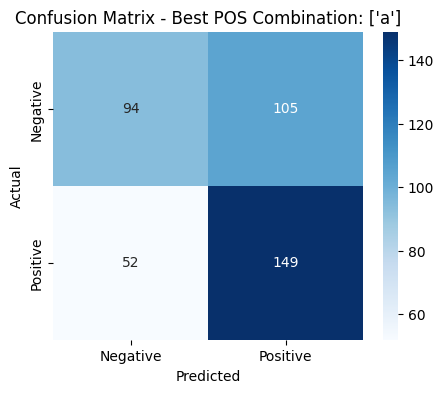

In [10]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
sentiment_scores = []

# Definir las combinaciones de POS
pos_combinations = [
    ['a'],  # Solo adjetivos
    ['n', 'a', 'r'],  # Sustantivos, adjetivos y adverbios
    ['n', 'a', 'v', 'r']  # Sustantivos, adjetivos, verbos y adverbios
]

best_combination = None
best_score = 0
evaluation_results = {}

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(reviews, [1 if fileid.split('/')[0] == 'pos' else 0 for fileid in movie_reviews.fileids()], test_size=0.2, random_state=42)

# Lista para guardar las reseñas mal clasificadas
misclassified_reviews_dict = {}

# Evaluar cada combinación de POS
for i, pos_combination in enumerate(pos_combinations):
    
    # Calcular los sentimientos para las reseñas de test
    sentiments = []
    for index, review in enumerate(X_test):
        pos_score, neg_score = preprocess_review(review, use_pos=set(pos_combination))
        sentiment = "Positiu" if pos_score > neg_score else "Negatiu"
        sentiments.append(sentiment)

        # Verificar si la clasificación es incorrecta y guardarla en el diccionario
        if (sentiment == "Positiu" and y_test[index] == 0) or (sentiment == "Negatiu" and y_test[index] == 1):
            misclassified_reviews_dict[index] = {
                'review': review,
                'predicted_sentiment': sentiment,
                'actual_sentiment': 'Positiu' if y_test[index] == 1 else 'Negatiu'
            }
    
    # Calcular la precisión
    sentiments_binary = [1 if sentiment == "Positiu" else 0 for sentiment in sentiments]
    accuracy = accuracy_score(y_test, sentiments_binary)
    evaluation_results[tuple(pos_combination)] = accuracy
    
    # Si esta combinación tiene el mejor puntaje de precisión, la guardamos
    if accuracy > best_score:
        best_score = accuracy
        best_combination = pos_combination

# Imprimir los resultados de la mejor combinación
print(f"\nBest POS combination: {best_combination}")
print(f"Best Accuracy: {best_score:.4f}")


# Visualizar los resultados con una matriz de confusión
best_sentiments = []
for review in X_test:
    pos_score, neg_score = preprocess_review(review, use_pos=set(best_combination))
    best_sentiment = "Positiu" if pos_score > neg_score else "Negatiu"
    best_sentiments.append(best_sentiment)

# Convertir las predicciones a 1 (positivo) y 0 (negativo) para la matriz de confusión
best_sentiments_binary = [1 if sentiment == "Positiu" else 0 for sentiment in best_sentiments]

# Matriz de confusión
cm = confusion_matrix(y_test, best_sentiments_binary)

# Visualizar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best POS Combination: {best_combination}')
plt.show()




En les ressenyes mal classificades com a negatives quan en realitat són positives, podem identificar algunes característiques comunes que es repeteixen. Per exemple, per a la ressenya de The Verdict, tot i que es fa un gran elogi a l’actuació d’actors com Kathy Bates i es destaca la qualitat de la pel·lícula, el classificador la va identificar com a negativa. Això pot ser degut a l'ús d'expressions com "no gaire original" o a referències a escenes que, tot i ser intenses, podrien semblar repetitives.

Per contra, en les ressenyes erròniament positives, es tendeix a centrar-se en elements com l’espectacularitat visual o les actuacions que, tot i ser destacables, no compensen les deficiències més profundes del guió o la trama. Un exemple clar d’això és la crítica a "Planet of the Apes", on es resalta el maquillatge i les aparences visuals com si fossin suficients per considerar la pel·lícula una bona obra, però es passa per alt que la història és incoherent o el guió mancat. 

En general, les ressenyes mal classificades sovint es deuen al fet que el classificador pot confondre el to irònic o la menció d'aspectes positius dins de crítiques negatives. Quan els usuaris utilitzen un to sarcàstic o assenyalen elements que els han agradat en una ressenya negativa, pot ser que el model interpreti això com una crítica positiva. Això genera una confusió en la classificació, ja que el sentiment general de la ressenya podria ser negatiu, però el classificador es veu influït per els elements positius mencionats de manera irònica. A l'inrevés, en les ressenyes positives, l'èmfasi en aspectes com el mal ús de determinats elements o les crítiques a alguns punts específics, sense un to clarament negatiu, pot portar a la confusió i a una classificació errònia com a negativa.

In [ ]:
# Mostrar algunas de las reseñas mal clasificadas (primeras 10)
for index in list(misclassified_reviews_dict.keys())[:10]:
    review_data = misclassified_reviews_dict[index]
    print(f"Review {index}:")
    print(f"Review: {review_data['review']}")
    print(f"Predicted Sentiment: {review_data['predicted_sentiment']}")
    print(f"Actual Sentiment: {review_data['actual_sentiment']}")
    print("-" * 80)

## COMPARACIÓ DE MODELS 

En analitzar els resultats dels dos models, podem veure que el model de regressió logística té una precisió molt més gran (0.8650) que el model basat en les categories gramaticals (0.6075). A la matriu de confusió del model de regressió logística, podem observar que la majoria de les prediccions es distribueixen correctament en les categories positives i negatives, cosa que reflecteix una bona capacitat del model per distingir entre ambdues classes. La quantitat de falsos positius (24) i falsos negatius (30) és relativament baixa, cosa que indica que el model ha aconseguit un equilibri raonable en la predicció de les dues classes.

D'altra banda, la matriu de confusió del model basat en categories gramaticals mostra que aquest model té més quantitat de falsos positius (105) i falsos negatius (52). Això indica que el model basat en categories gramaticals té dificultats per distingir correctament entre les classes positives i negatives, cosa que es tradueix en una precisió significativament més baixa.

La gran diferència en els resultats es pot explicar per diverses raons. En primer lloc, el model de regressió logística té capacitat per aprendre patrons complexos a partir de múltiples característiques (en aquest cas, els vectors de característiques del text). Això permet que el model capturi les relacions i els matisos entre les paraules i els seus contextos de manera més efectiva. En canvi, el model basat en categories gramaticals només depèn d'una representació simplificada del text, cosa que limita la seva capacitat per entendre el context complet i la interacció entre les paraules.

En resum, el model de regressió logística és clarament més eficaç per a aquest problema de classificació de sentiments, ja que pot capturar una gamma més àmplia de característiques i relacions dins del text.